In [170]:
# Dataset - 'All Space Missions from 1957' - from https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957?resource=download

In [171]:
# Task 1 - გამოიყენეთ მონაცემთა წმედის რომელიმე ფუნქციონალი (მაგ. რომელიმე სვეტის მონაცემები
# გადაანაწილეთ რამდენიმე ახალ სვეტად, წაშალეთ რომელიმე სვეტი, ცარიელი მნიშვნელობებისთვის
# გამოიყენეთ სასურველი ფორმატი, ა.შ.)

In [172]:
# დავაიმპორტოთ pandas და წავიკითხოთ csv ფაილი
import pandas as pd

df = pd.read_csv('/Space_Corrected.csv')
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [173]:
# ინფორმაცია ჩანაწერთა რაოდენობასა და ტიპებზე
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [174]:
# შევამოწმოთ ცარიელი ჩანაწერების ჯამი თითოეულ სვეტში
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [175]:
# გავიგოთ რა სვეტები გვაქვს dataframe-ში
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [176]:
# Extract-ის გამოყენებით გადავანაწილოთ მონაცემები Datum სვეტიდან ორ სვეტად - Date, Time
df[['Date', 'Time']] = df['Datum'].str.extract(r'(\w+ \d{2}, \d{4}) (\d{2}:\d{2})')

In [177]:
# შევავსოთ ცარიელი მნიშვნელობები პირობითად 'Unknown'-ით
df.fillna(value='Unknown', inplace=True)

In [178]:
# წავშალოთ სვეტები 'Unnamed: 0.1', 'Unnamed: 0' და 'Datum'
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Datum'], inplace=True)

In [179]:
# დავბეჭდოთ df ცვლილებების შემდეგ
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,"Aug 07, 2020",05:12
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,"Aug 06, 2020",04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Unknown,Success,"Aug 04, 2020",23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,"Jul 30, 2020",21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,"Jul 30, 2020",11:50
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Unknown,Failure,"Feb 05, 1958",07:33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Unknown,Success,"Feb 01, 1958",03:48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Unknown,Failure,"Dec 06, 1957",16:44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Unknown,Success,"Nov 03, 1957",02:30


In [180]:
# Task 2 - რიცხვითი ტიპის ველის მონაცემები დაყავით კატეგორიებად cut() ფუნქციის გამოყენებით (მაგ.
# ასაკის ველი 3 კატეგორიად „Children”, “Adolescent”, “Old”). შესაბამისად დაამატეთ კატეგორიის სვეტი.

In [181]:
# 'Date' სვეტიდან ამოვშალოთ 'Unknown' ჩანაწერები
df = df[df['Date'] != 'Unknown']

In [ ]:
# გამოვყოთ წლები იმავე "Date" სვეტიდან
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

In [183]:
# განვსაზღვროთ კატეგორიების bins და labels - მისიები წლების მიხედვით დავყოთ შემდეგ კატეგორიებად - old, new, latest
bins = [min(df['Year'].dropna()), 2000, 2010, float('inf')]
labels = ['old', 'new', 'latest']

In [ ]:
# cut()-ის გამოყენებით შევქმნათ კატეგორიები
df['Category'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

In [185]:
# დავბეჭდოთ df ცვლილებების შემდეგ
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date,Time,Year,Category
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,"Aug 07, 2020",05:12,2020,latest
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,"Aug 06, 2020",04:01,2020,latest
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Unknown,Success,"Aug 04, 2020",23:57,2020,latest
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,"Jul 30, 2020",21:25,2020,latest
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,"Jul 30, 2020",11:50,2020,latest
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Unknown,Failure,"Feb 05, 1958",07:33,1958,old
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Unknown,Success,"Feb 01, 1958",03:48,1958,old
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Unknown,Failure,"Dec 06, 1957",16:44,1957,old
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Unknown,Success,"Nov 03, 1957",02:30,1957,old


In [186]:
# Task 3 - გამოიყენეთ მონაცემთა “Reshaping”-ის ჩამოთვლილი ფუნქციებიდან რომელიმე 2 მათგანი
# (stack(), unstack(), melt(), pivot(), explode(), pivot_table(), Crosstab())

In [187]:
import numpy as np

In [188]:
# გამოვყოთ სვეტების და შესაბამისი რამდენიმე ჩანაწერი DataFrame-დან (ეს იმიტომ, რომ მთლიან df-ზე მუშაობა გარკვეულ ხარვეზებთან იყო დაკავშირებული)
data = {
    "Company Name": ["SpaceX", "CASC", "SpaceX", "Roscosmos", "ULA"],
    "Location": ["LC-39A, Kennedy Space Center, Florida, USA",
                 "Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China",
                 "Pad A, Boca Chica, Texas, USA",
                 "Site 200/39, Baikonur Cosmodrome, Kazakhstan",
                 "SLC-41, Cape Canaveral AFS, Florida, USA"],
    "Detail": ["Falcon 9 Block 5 | Starlink V1 L9 & BlackSky",
               "Long March 2D | Gaofen-9 04 & Q-SAT",
               "Starship Prototype | 150 Meter Hop",
               "Proton-M/Briz-M | Ekspress-80 & Ekspress-103",
               "Atlas V 541 | Perseverance"],
    "Status Rocket": ["StatusActive", "StatusActive", "StatusActive", "StatusActive", "StatusActive"],
    "Rocket": [50.0, 29.75, np.nan, 65.0, 145.0],
    "Status Mission": ["Success", "Success", "Success", "Success", "Success"],
    "Date": ["Aug 07, 2020", "Aug 06, 2020", "Aug 04, 2020", "Jul 30, 2020", "Jul 30, 2020"],
    "Time": ["05:12", "04:01", "23:57", "21:25", "11:50"],
    "Year": [2020, 2020, 2020, 2020, 2020],
    "Category": ["latest", "latest", "latest", "latest", "latest"]
}

df1 = pd.DataFrame(data)
df1

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date,Time,Year,Category
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,"Aug 07, 2020",05:12,2020,latest
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,"Aug 06, 2020",04:01,2020,latest
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,"Aug 04, 2020",23:57,2020,latest
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,"Jul 30, 2020",21:25,2020,latest
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,"Jul 30, 2020",11:50,2020,latest


In [189]:
# melt() ფუნქცია - df-ის ტრანფორმაცია long ფორმატში
melted_df1 = pd.melt(df1, id_vars=['Company Name', 'Location'], value_vars=['Status Rocket', 'Status Mission', 'Category'],
                    var_name='Var', value_name='Value')
print(melted_df1)

   Company Name                                           Location  \
0        SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1          CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2        SpaceX                      Pad A, Boca Chica, Texas, USA   
3     Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5        SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
6          CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
7        SpaceX                      Pad A, Boca Chica, Texas, USA   
8     Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
9           ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
10       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
11         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
12       SpaceX                      Pad A, Boca Chica, Texas, USA   
13    Roscosmos     

In [190]:
# Pivot Table - შეაჯამოთ მისიების რაოდენობა თითოეულ კომპანიაში კატეგორიის მიხედვით
pivot_table_df1 = pd.pivot_table(df1, values='Rocket', index='Company Name', columns='Category', aggfunc='count', fill_value=0)
print(pivot_table_df1)

Category      latest
Company Name        
CASC               1
Roscosmos          1
SpaceX             1
ULA                1


In [191]:
# მონაცემთა Stack-ირება
stacked_df1 = df1.stack()

stacked_df1

0  Company Name                                                 SpaceX
   Location                 LC-39A, Kennedy Space Center, Florida, USA
   Detail                 Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
   Status Rocket                                          StatusActive
   Rocket                                                         50.0
   Status Mission                                              Success
   Date                                                   Aug 07, 2020
   Time                                                          05:12
   Year                                                           2020
   Category                                                     latest
1  Company Name                                                   CASC
   Location          Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
   Detail                          Long March 2D | Gaofen-9 04 & Q-SAT
   Status Rocket                                          StatusActive
   Roc

In [192]:
# Crosstab -  ქროს-ტაბულაცია'Company Name' და 'Category'-ის შორის
crosstab_df1 = pd.crosstab(df1['Company Name'], df1['Category'])

print(crosstab_df1)

Category      latest
Company Name        
CASC               1
Roscosmos          1
SpaceX             2
ULA                1


In [193]:
# Task 4 - ააგეთ თქვენთვის სასურველი 4 განსხვავებული დიაგრამა შემდეგი ტიპებიდან (ხაზოვანი
# დიაგრამა, სვეტოვანი დიაგრამა, გაფანტულობის დიაგრამა, წრიული დიაგრამა, ჰისტოგრამა).

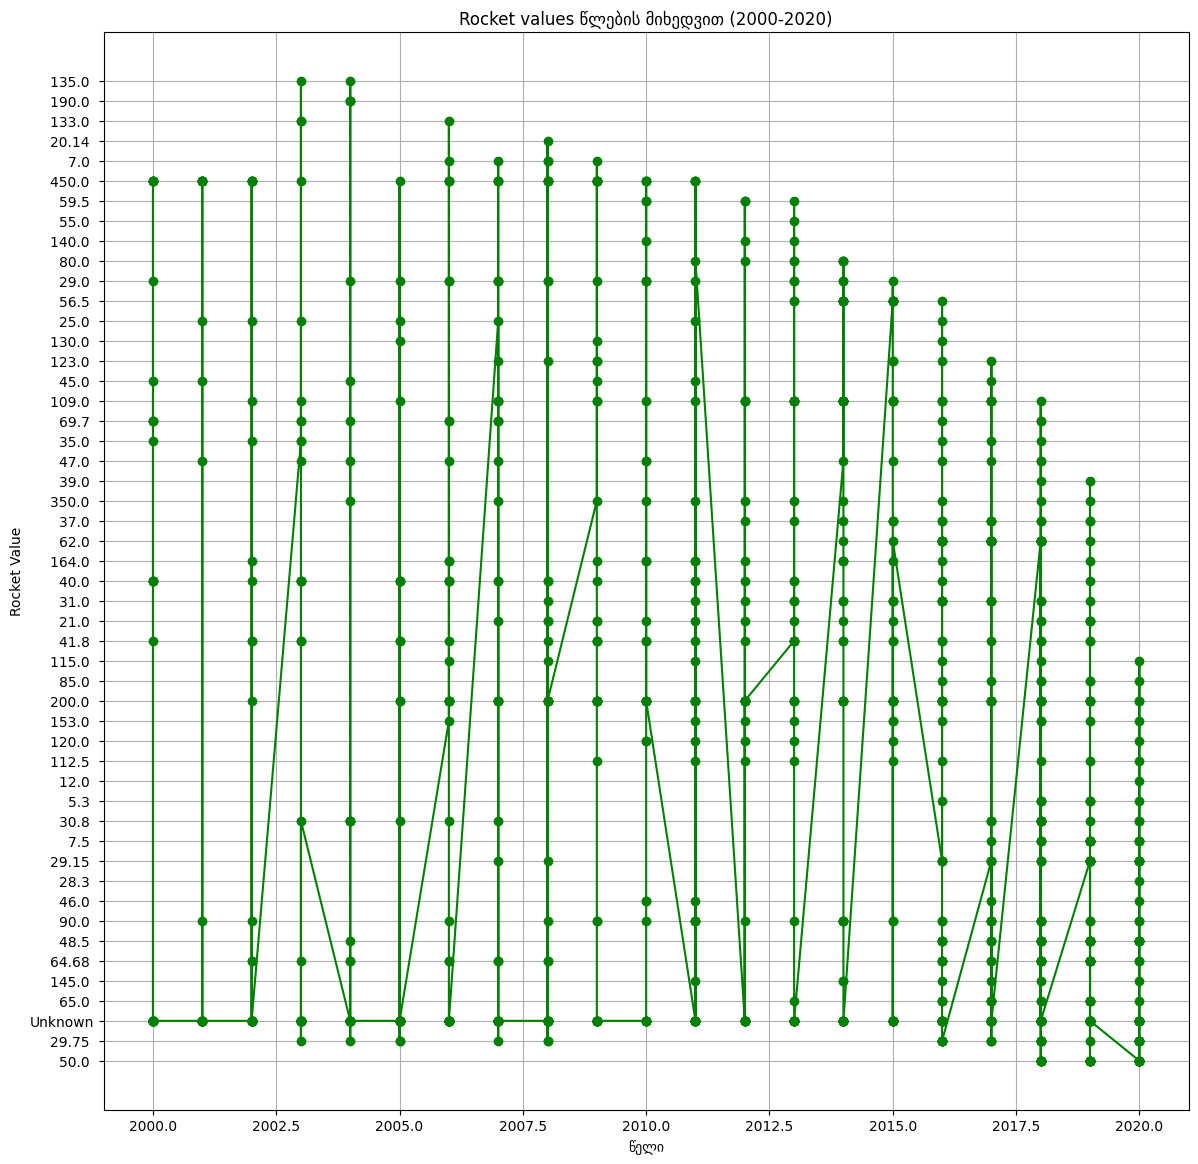

In [194]:
import matplotlib.pyplot as plt

# 1. ხაზოვანი დიაგრამა
# Rocket values წლების მიხედვით

# გავფილტროტ წლები 2000-დან 2020-მდე, რათა დიაგრამაზე კარგად გამოჩნდეს
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

years = df_filtered['Year']
rocket_values = df_filtered[' Rocket']

plt.figure(figsize=(14, 14))
plt.plot(years, rocket_values, marker='o', color='green')
plt.title('Rocket values წლების მიხედვით (2000-2020)')
plt.xlabel('წელი')
plt.ylabel('Rocket Value')
plt.grid(True)
plt.show()


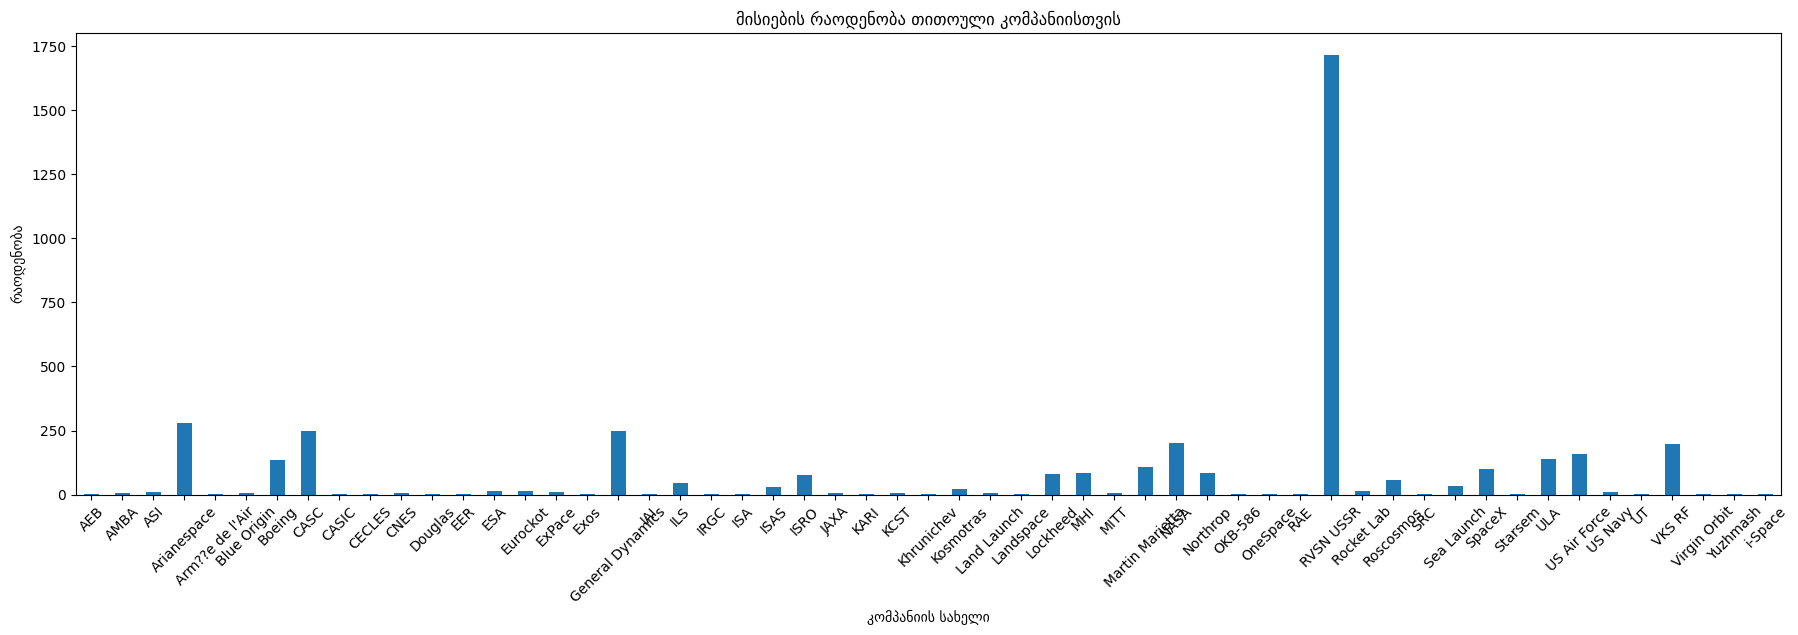

In [195]:
# 2. Bar Chart
# სვეტოვანი დიაგრამით ვაჩვენოთ მისიების რაოდენობა თითოული კომპანიისთვის

# მონაცემთა დაჯგუფება კომპანიის სახელების მიხედვიტ
missions_count = df.groupby('Company Name').size()

plt.figure(figsize=(22, 6))
missions_count.plot(kind='bar')
plt.title('მისიების რაოდენობა თითოული კომპანიისთვის')
plt.xlabel('კომპანიის სახელი')
plt.ylabel('რაოდენობა')
plt.xticks(rotation=45)
plt.show()


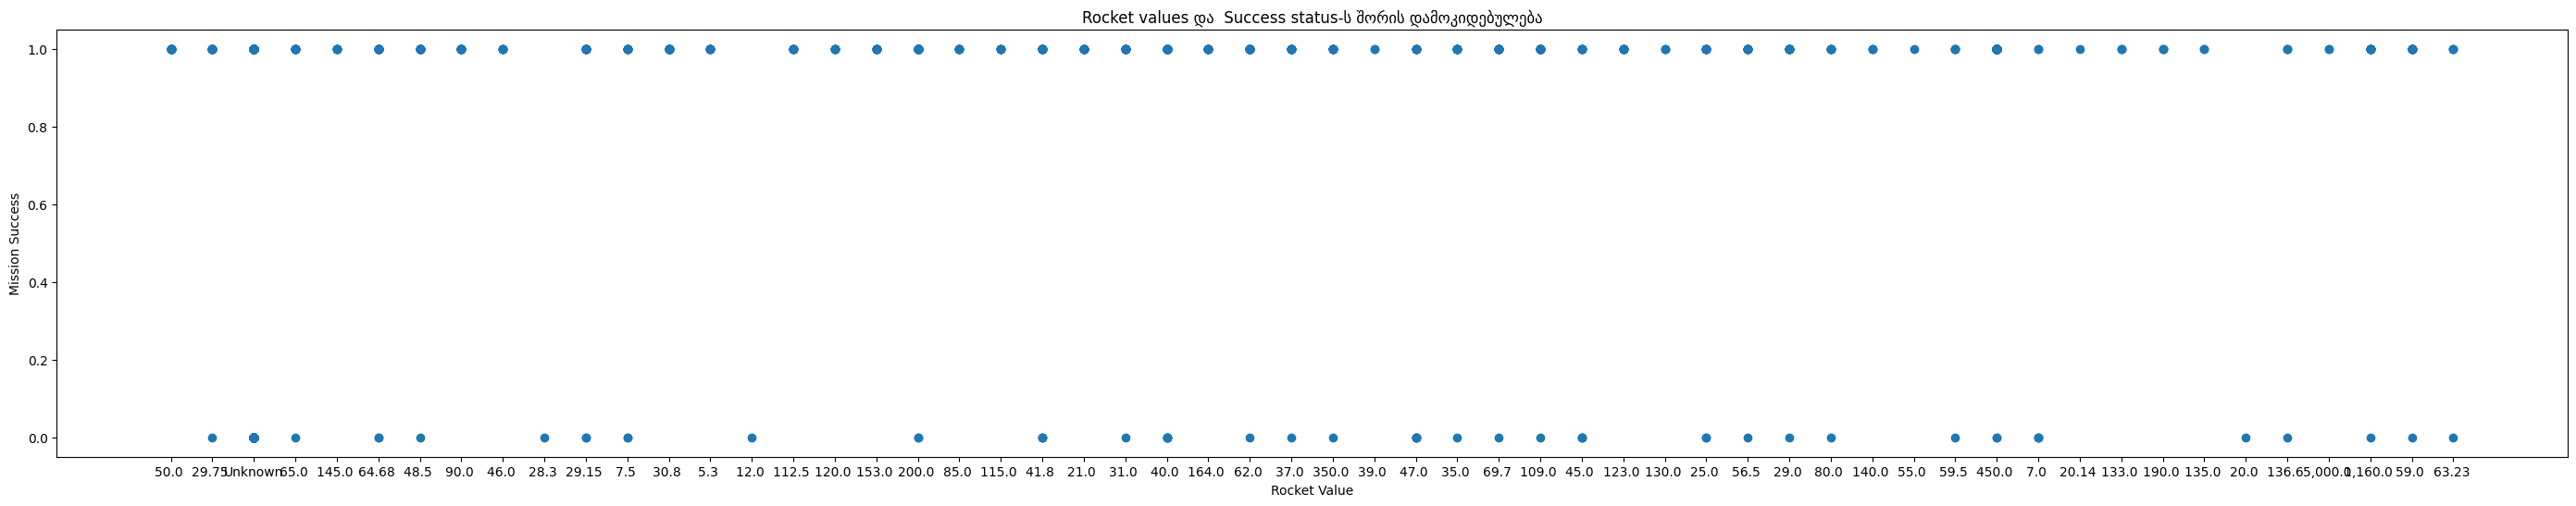

In [196]:
# 3. Scatter Chart:
# გაფანტულობის დიაგრამის მეშვეობით გამოვსახოთ Rocket values და  Success status-ს შორის დამოკიდებულება

rocket_values = df[' Rocket']
success_status = df['Status Mission'] == 'Success'

plt.figure(figsize=(35, 6))
plt.scatter(rocket_values, success_status)
plt.title('Rocket values და  Success status-ს შორის დამოკიდებულება')
plt.xlabel('Rocket Value')
plt.ylabel('Mission Success')
plt.show()


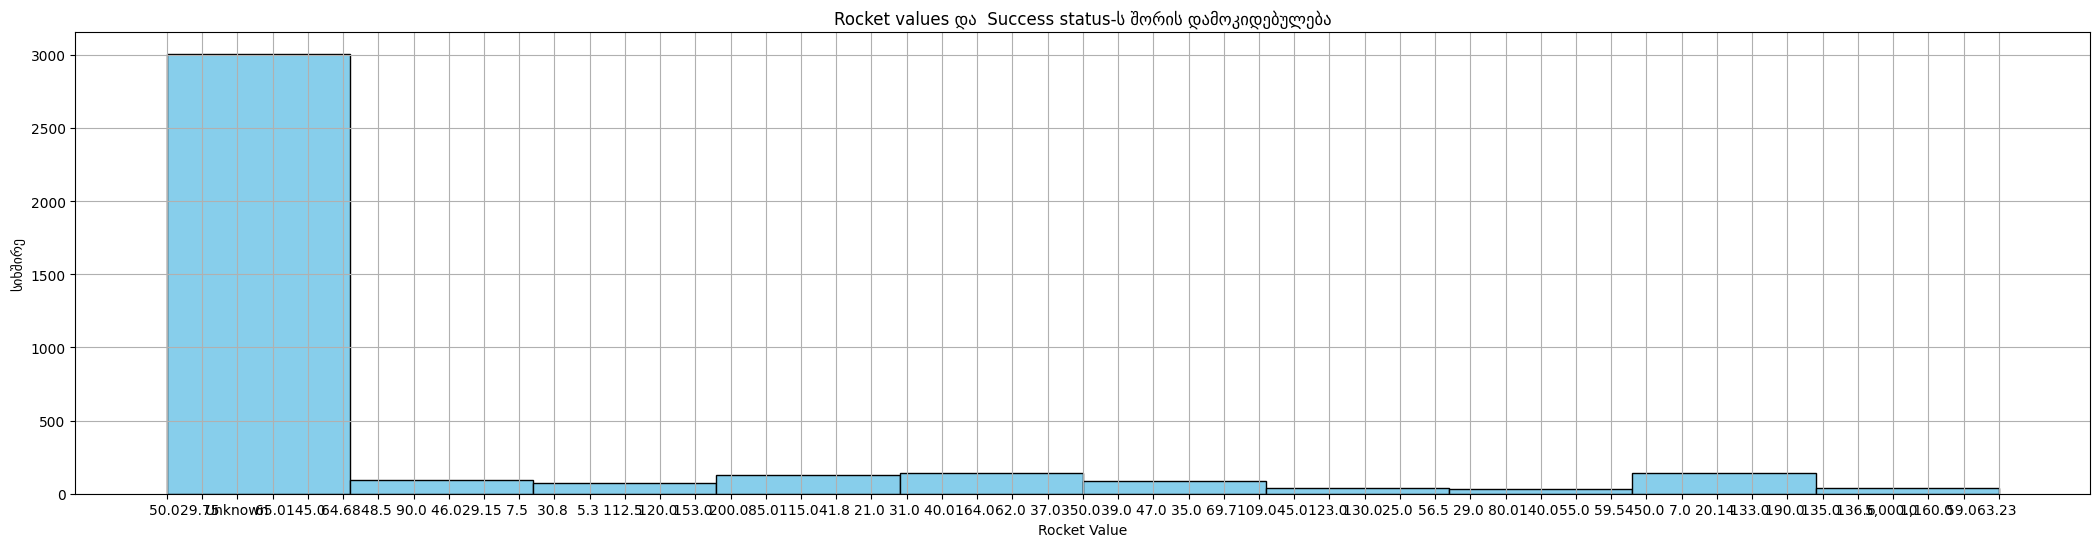

In [197]:
# 4. ასევე შედარებით უკეთეს ვიზუალიზაცია ვიღებთ ჰისტოგრამის საშუალებით

rocket_values_success = df.loc[df['Status Mission'] == 'Success', ' Rocket']

plt.figure(figsize=(26, 6))

plt.hist(rocket_values_success, bins=10, color='skyblue', edgecolor='black')
plt.title('Rocket values და  Success status-ს შორის დამოკიდებულება')
plt.xlabel('Rocket Value')
plt.ylabel('სიხშირე')
plt.grid(True)
plt.show()

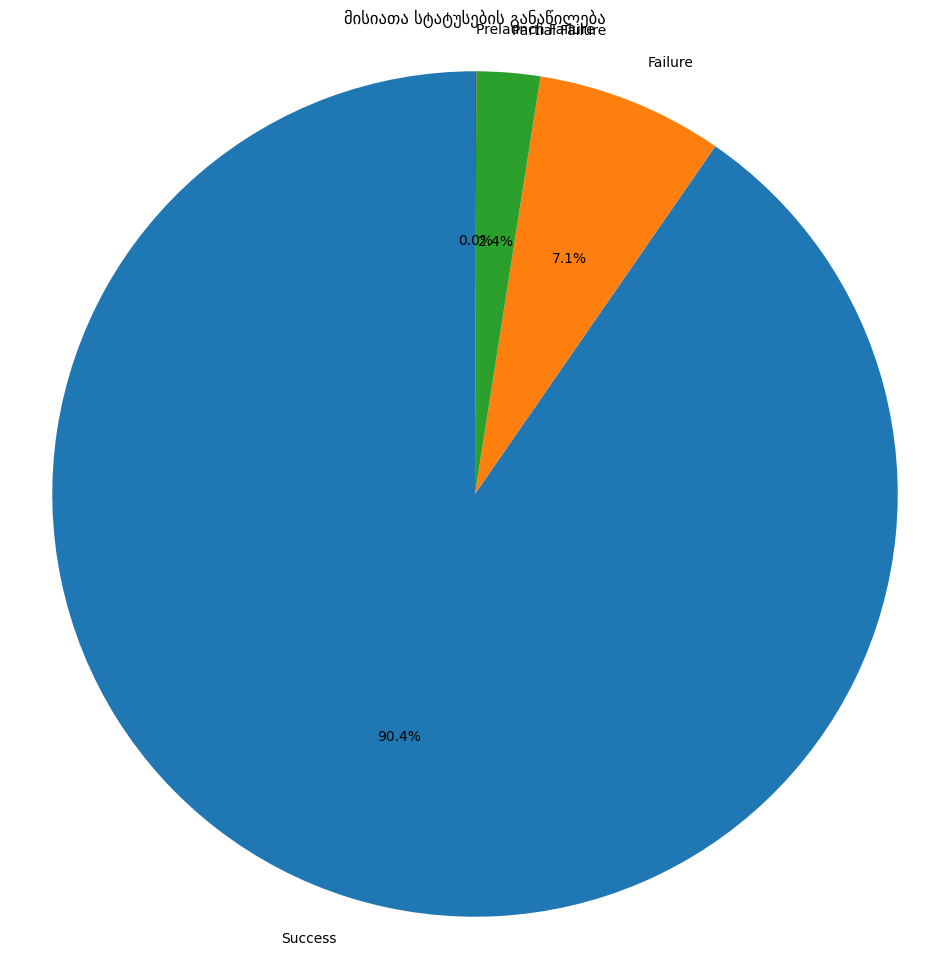

In [198]:
# 5. Pie Chart:
# წრიული დიაგრამით გამოვსახოთ მისიის სტატუსების განაწილება

status_distribution = df['Status Mission'].value_counts()

plt.figure(figsize=(12, 12))
status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('მისიათა სტატუსების განაწილება')
plt.ylabel('')
plt.axis('equal')
plt.show()


In [199]:
# Task 5 -გამოიყენეთ თარიღებთან სამუშაო მინიმუმ 2 განსხვავებული ფუნქცია/ტრანსფორმაცია
# სურვილისამებრ (მაგ. resample ფუნქცია).

In [ ]:
#  'Date' სვეტი to_datetime ფორმატში გადავიყვანოთ
df['Date'] = pd.to_datetime(df['Date'])

# გამოვყოთ თვისა და დღის სახელწოდებები month_name და day_name ფუნქციების დახმარებით
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [201]:
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date,Time,Year,Category,Month,Day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,05:12,2020,latest,August,Friday
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,04:01,2020,latest,August,Thursday
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Unknown,Success,2020-08-04,23:57,2020,latest,August,Tuesday
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,21:25,2020,latest,July,Thursday
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,11:50,2020,latest,July,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Unknown,Failure,1958-02-05,07:33,1958,old,February,Wednesday
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Unknown,Success,1958-02-01,03:48,1958,old,February,Saturday
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Unknown,Failure,1957-12-06,16:44,1957,old,December,Friday
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Unknown,Success,1957-11-03,02:30,1957,old,November,Sunday


In [ ]:
#  გამოვთვალოთ რამდენი დღე გავიდა თითოული მისიიდან დღევანდელ დღემდე
from datetime import datetime

todays_date = pd.to_datetime(datetime.today().date())

df['Days_Since_Today'] = (todays_date - df['Date']).dt.days

In [203]:
# დავბეჭდოთ საბოლოო DataFrame
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date,Time,Year,Category,Month,Day,Days_Since_Today
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,05:12,2020,latest,August,Friday,1402
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,04:01,2020,latest,August,Thursday,1403
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Unknown,Success,2020-08-04,23:57,2020,latest,August,Tuesday,1405
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,21:25,2020,latest,July,Thursday,1410
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,11:50,2020,latest,July,Thursday,1410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Unknown,Failure,1958-02-05,07:33,1958,old,February,Wednesday,24231
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Unknown,Success,1958-02-01,03:48,1958,old,February,Saturday,24235
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Unknown,Failure,1957-12-06,16:44,1957,old,December,Friday,24292
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Unknown,Success,1957-11-03,02:30,1957,old,November,Sunday,24325
